In [193]:
import sys
import math
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math

from scipy.stats import t, chi2, f, norm, poisson, binom, uniform

In [18]:
np.set_printoptions(suppress = True)  # уберем scientific notation

# Выборочная функция распределения


In [227]:
# запрограммируйте функции,
#    позволяющие рассчитывать значение выборочной
#    функции распределения для каждого:
#    1)    Наблюдения в выборке
#    2*)   Значения в произвольном векторе


def ECDF(data, t):   
#вычисляет выборочную ф.р. для каждого элемента произвольного вектора 
#или для произвольной точки
    if isinstance(t, list) or isinstance(t, np.ndarray):
        return [np.mean(data<=x)  for x in t]
    if type(t) in [int,float]:
         return np.mean(data<=t)                #доля тех xi, что < x

In [120]:
#генерируем выборку из Хи - квадрат с 5 сепенями свободы
df = 5
x = chi2.rvs( size = 1000, df=df)

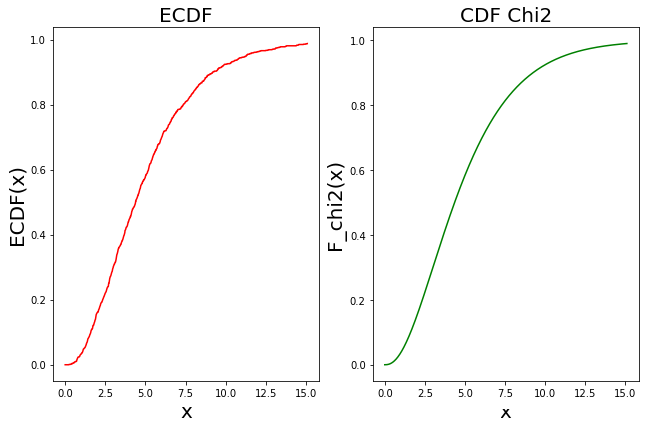

In [123]:
#Строим выборочную ф.р.
t = np.linspace(0, chi2.ppf(0.99, df= df), num = 1000)
y1= ECDF(x,t)


fig, axes = plt.subplots(nrows= 1, ncols =2)

fig.set_size_inches(10.5, 6.5)

axes[0].plot(t,y1,'r',label='ECDF')
axes[0].set_title('ECDF', fontsize= 20)
axes[0].set_xlabel('х', fontsize= 20)
axes[0].set_ylabel('ECDF(x)', fontsize= 20)


axes[1].plot(t, chi2.cdf(t,df=df),'g',label='CDF')
axes[1].set_title('CDF Chi2', fontsize= 20)

axes[1].set_xlabel('х', fontsize= 20)
axes[1].set_ylabel('F_chi2(x)', fontsize= 20)
plt.show()

# Гистограмма

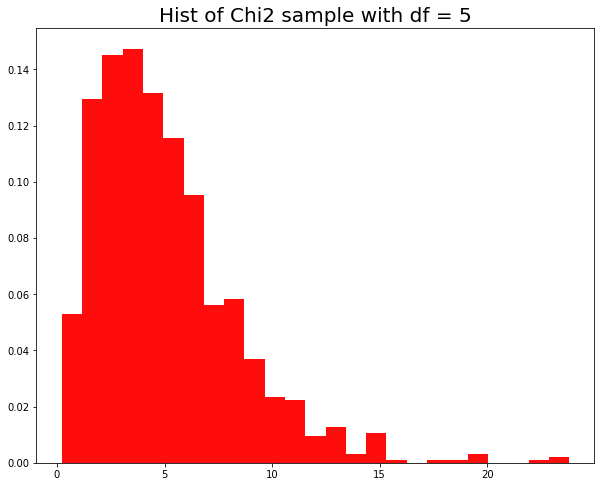

In [124]:
fig, ax = plt.subplots()


fig.set_size_inches(10,8)
ax.hist(x, bins = 25, density  = True,
                    color = 'r', alpha = 0.95
       )
ax.set_title('Hist of Chi2 sample with df = {}'.format(df), fontsize= 20)

plt.show()

# Задания

In [125]:
#1. Постройте графики гистограммы и выборочной
#    функции распредленеия для распределений:
#    1)     Хи-Квадрат с 8-ю степенями свободы
#    2)     Стьюдента с 10-ю степенями свободы
#    3)     Нормального с математическим ожиданием 10
#           и дисперсией 25

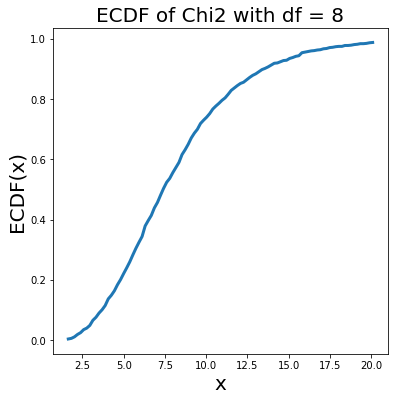

In [143]:
#    1)     Хи-Квадрат с 8-ю степенями свободы

df = 8

x= np.linspace(scipy.stats.chi2.ppf(0.01, df=df), 
               scipy.stats.chi2.ppf(0.99, df=df), 
               num = 100 )

y= scipy.stats.chi2.rvs(size = 1000, df=df)
F_x = ECDF(y,x)


fig, ax = plt.subplots()
fig.set_size_inches(6,6)

ax.plot(x,F_x,linewidth=3)
ax.set_title('ECDF of Chi2 with df = {}'.format(df) ,fontsize=20)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('ECDF(x)', fontsize=20)

plt.show()

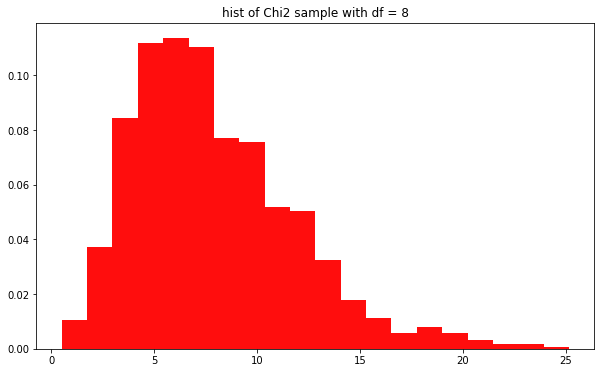

In [134]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)

ax.hist(y, bins = 20, alpha =0.95, color= 'r', density  = True)
ax.set_title('hist of Chi2 sample with df = {}'.format(df))
plt.show()

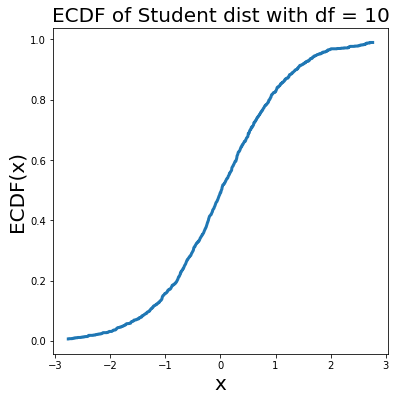

In [137]:
#    2)     Стьюдента с 10-ю степенями свободы

df=10
x=np.linspace(scipy.stats.t.ppf(0.01, df=df),
              scipy.stats.t.ppf(0.99, df=df), 
              num = 1000)

y= scipy.stats.t.rvs(size= 1000, df=df)
F_x= ECDF(y,x)

fig, ax = plt.subplots()
fig.set_size_inches(6,6)

ax.plot(x,F_x,linewidth=3)
ax.set_title('ECDF of Student dist with df = {}'.format(df) ,fontsize=20)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('ECDF(x)', fontsize=20)

plt.show()

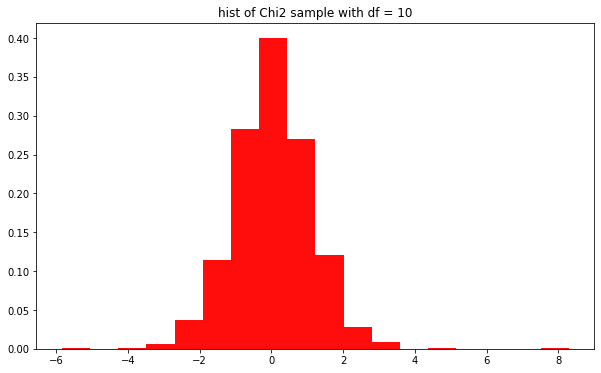

In [140]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)

ax.hist(y, bins = 18, alpha =0.95, color= 'r', density  = True)
ax.set_title('hist of Chi2 sample with df = {}'.format(df))
plt.show()

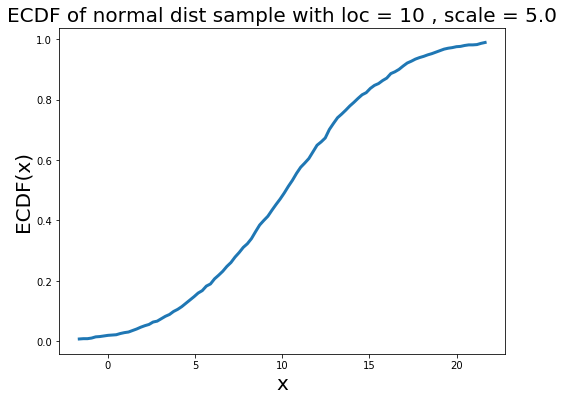

In [154]:
#    3)     Нормального с математическим ожиданием 10
#           и дисперсией 25
mu=10
var=25

x = np.linspace(scipy.stats.norm.ppf(q =0.01 ,loc=mu, scale = np.sqrt(var)),
               scipy.stats.norm.ppf(q =0.99 ,loc=mu, scale = np.sqrt(var)),
               num= 100
               )
y= scipy.stats.norm.rvs(loc=mu, scale = np.sqrt(var), size= 1000)

F_x = ECDF(y,x)


fig, ax = plt.subplots()

fig.set_size_inches(8,6)

ax.plot(x,F_x, linewidth =3)
ax.set_title(
    'ECDF of normal dist sample with loc = {} , scale = {}'\
            .format(mu,np.sqrt(var) ) ,fontsize= 20   )
ax.set_xlabel('x' ,fontsize= 20 )
ax.set_ylabel('ECDF(x)' ,fontsize= 20 )

plt.show()


In [ ]:
# 2. В каждом пункте предыдущего задания проверьте,
#    как объем выборки влияет на то, насколько близки
#    окажутся выборочные и истинные характеристики
#    распределения. Сравните выборки объемом
#    в 10, 100, 1000 и 10000 наблюдений. При увеличении
#    объема выборки увеличивайте число столбиков
#    в гистограмме.

Посмотрим как сходятся выборочные характеристики: матожидание и дисперсия  
Для распредления Хи - квадрат с 10 степенями свободы

In [176]:


n=10
means=[]
var_s =[]
n_vec = []
while n <= 100000:
    y= scipy.stats.chi2.rvs(size = n, df=df)
    var_s.append( np.var(y))
    means.append(np.mean(y))
    n_vec.append(n)
    n+=1000
E_chi2 = [scipy.stats.chi2.mean(df=df) for i in range(len(means))]
Var_chi2= [scipy.stats.chi2.var(df=df) for i in range(len(means))]


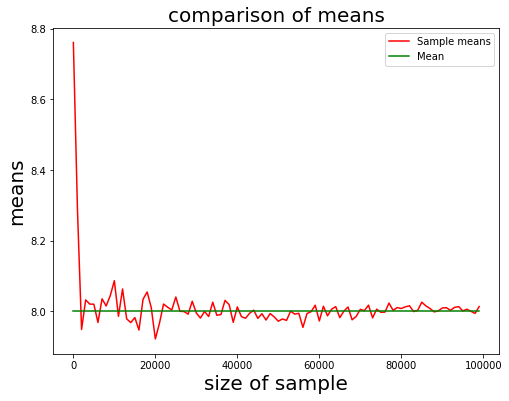

In [179]:
fig,ax= plt.subplots()

fig.set_size_inches(8,6)



ax.plot(n_vec,means, color = 'r'  ,label='Sample means')
ax.plot( n_vec, E_chi2, color = 'g', label = 'Mean')
ax.set_title('comparison of means',fontsize= 20 )
ax.set_xlabel('size of sample', fontsize= 20)
ax.set_ylabel('means', fontsize= 20)

ax.legend()
plt.show()

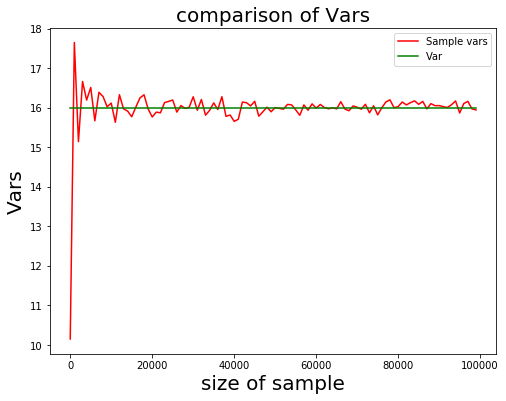

In [181]:
fig,ax= plt.subplots()

fig.set_size_inches(8,6)



ax.plot(n_vec,var_s, color = 'r'  ,label='Sample vars')
ax.plot( n_vec, Var_chi2, color = 'g', label = 'Var')
ax.set_title('comparison of Vars',fontsize= 20)
ax.set_xlabel('size of sample',fontsize= 20)
ax.set_ylabel('Vars',fontsize= 20)

ax.legend()
plt.show()

Посмотрим на сходимость Выборочных функций распределения к истинной функции распрпделения

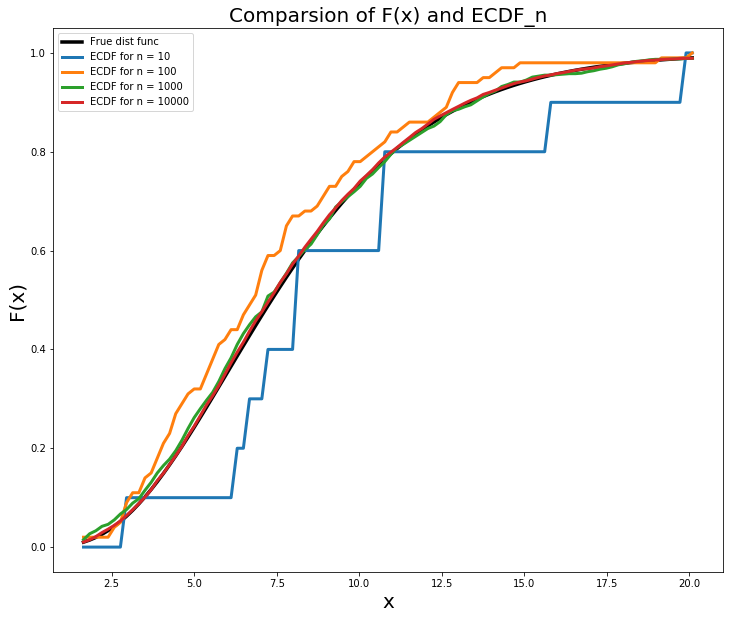

In [191]:
fig, ax= plt.subplots()

fig.set_size_inches(12,10)


x=np.linspace(scipy.stats.chi2.ppf(q= 0.01, df=df),
                 scipy.stats.chi2.ppf(q=0.99,df=df),
                 num=100 )                 #точки для отрисовки

F_x = scipy.stats.chi2.cdf(x, df=df)       #значения истинной ф.р.


ax.plot(x,F_x, label='Frue dist func',linewidth =3.5, color= 'black')

for n in [10,100,1000,10000]:
  
    y = scipy.stats.chi2.rvs(df=df, size=n)

    ECDF_n = ECDF(y, x)
    ax.plot(x,ECDF_n, label='ECDF for n = {}'.format(n),
              linewidth =3 )
ax.legend()    
ax.set_title('Comparsion of F(x) and ECDF_n',fontsize=20)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('F(x)',fontsize=20)
plt.show()

Посмотрим, как гистограммы приближаюстся в истинной плотности  
Число столбцов в гистограмме будем считать по правилу Стёрджеса  
В виде $n = 1 + [log_2N]$

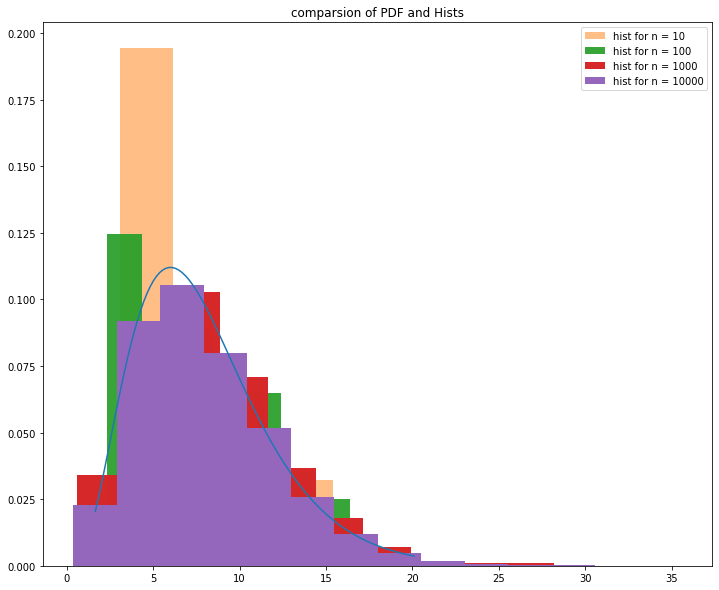

In [212]:
fig, ax= plt.subplots()

fig.set_size_inches(12,10)

f_x=scipy.stats.chi2.pdf(x,df=df)

ax.plot(x,f_x)

for n in [10,100,1000,10000]:
    y = scipy.stats.chi2.rvs(df=df, size=n)
    bins = 1+ math.floor( np.log2(n))
    ax.hist(y,bins = bins, density  = True, label='hist for n = {}'.format(n),
            alpha = 1- 5/n )

ax.set_title('comparsion of PDF and Hists')
ax.legend()
plt.show()


In [228]:
# 3. Самостоятельно запрограммируйте функции,
#    позволяющие рассчитывать значение выборочной
#    функции распределения для каждого:
#    1)    Наблюдения в выборке
#    2*)   Значения в произвольном векторе


#Реализовано вначале ноутбука

In [ ]:
# 4. Самостоятельно запрограммируйте функции,
#    позволяющие рассчитывать значение гистограммы
#    для каждого:
#    1)    Наблюдения в выборке
#    2*)   Значения в произвольном векторе

In [334]:
def hist(data,x):
    #функция, высчитывающая значение гистограммы в точке x 
    #или в каждой точке x, если это list или np.array
    a=min(data)
    b=max(data)
    n_bins= 1 + math.floor(np.log2( len(data)  )     ) 
    delta = (b-a)/ n_bins
    
    #h[i] - высота i-го столбца
    h = np.array([   sum(data < a+delta*(i+1)) -  sum(data < a+(delta*i))   for i in range(n_bins)]) / (delta * len(data))
    
    
    if (type(x) in [int,float]):
        k = math.floor((x-a)/delta)
        return h[k]
    
    if isinstance(x, list) or isinstance(x, np.ndarray):
        return [h[math.floor((t-a)/delta)]   for t in x     ]
    
    

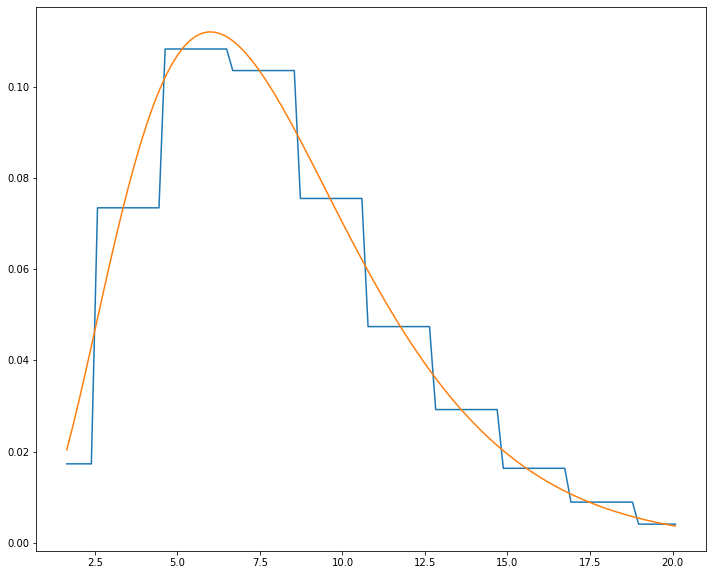

In [333]:
t = np.linspace(scipy.stats.chi2.ppf(0.01, df=df),
                scipy.stats.chi2.ppf(0.99, df=df),
                num=100
               )
x= scipy.stats.chi2.rvs(df=df , size = 10000)
f=hist(x,t)
f_x = scipy.stats.chi2.pdf(t,df=df)

fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.plot(t,f)
ax.plot(t,f_x)


In [ ]:
# 5. Самостоятельно запрограммируйте функции,
#    позволяющие по выборке строить график:
#    1)    Выборочной функции распределения
#    2*)   Гистограммы с произвольным
#          числом столбиков

In [342]:
def plot_ECDF(data):
    #Эта функция строит выборочную функцию распределения по заданной выборке data
    
    t=np.linspace(data.min(), data.max(), num= 1000)
    y = ECDF(data,t)
    
    fig,ax = plt.subplots()
    
    fig.set_size_inches(10,10)
    
    ax.plot(t,y, linewidth =3)
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('ECDF(x)', fontsize=20)
    ax.set_title('ECDF', fontsize=25)
    

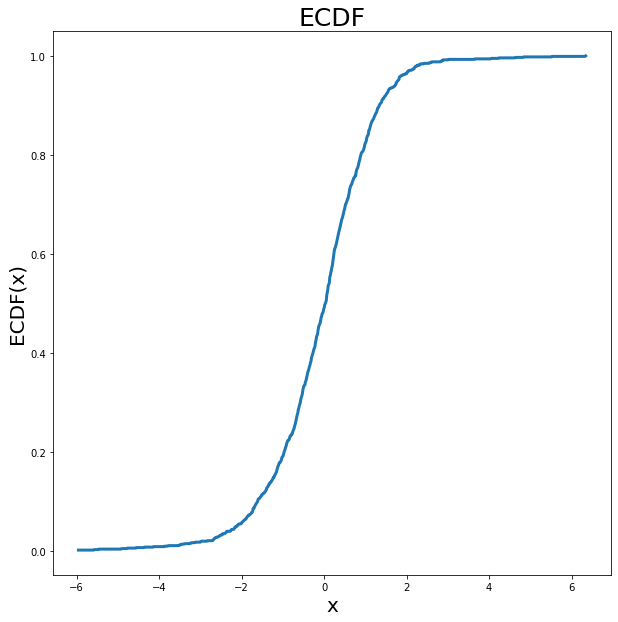

In [344]:
df=5
x=scipy.stats.t.rvs(df=df,size=1000)
plot_ECDF(x)


In [359]:
def plot_hist(data,n_bins = -1):
    #эта функция строит гистограмму с заданным числом столбцов по фиксированным данным data
    if n_bins== -1:
        n_bins = 1 + math.floor(np.log2(len(data)))
        
    fig,ax = plt.subplots()
    
    fig.set_size_inches(10,10)
    
    ax.hist(data,bins = n_bins, density  = True, label='hist with {} bins'.format(n_bins),
            alpha = 0.9 )

    ax.set_title('Hist of data', fontsize=20)
    ax.legend(fontsize=13)
    plt.plot()

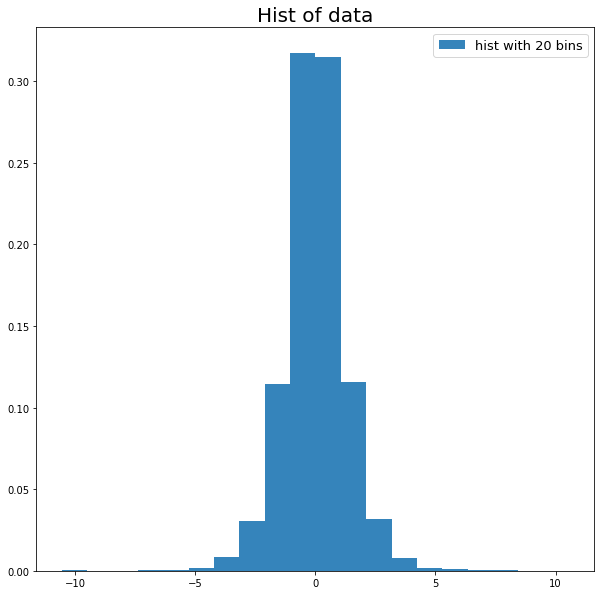

In [360]:
df=5
x=scipy.stats.t.rvs(df=df,size=10000)
plot_hist(x,20)


In [361]:
# 6. Используя ЗБЧ и несколько выборок из Хи-Квадрат
#    распределения приблизительно рассчитайте:
#    1**)  Математическое ожидание выборочной функции
#          распределения в точке 5
#    2**)  Дисперсию выборочной функции распределения
#          в точке 5

In [370]:
df=5
sample_size = 1000
N=100
data = [ scipy.stats.chi2.rvs(df=df, size= sample_size) for i in range(N)]

x0 = 5
F_x0 = np.array([ECDF(x,x0) for x in data])
E_F_x0 = F_x0.mean()
Var_f_x0 =  F_x0.var()

print('E_F_x0 = ',E_F_x0)
print('CDF(x0) = ' , scipy.stats.chi2.cdf(x0,df=df))

print('Var_f_x0 = ',Var_f_x0)




E_F_x0 =  0.5807700000000001
CDF(x0) =  0.584119813004492
Var_f_x0 =  0.00023273709999999985


Видим, что матожидание выборочной дисперсии в точке $x_0 = 5$  
стремится к истинному значению функции распределения в точке $x_0$ с ростом размера выборки